In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-prediction/Heart_Disease_Prediction.csv


In [2]:
# importing libraries
import pandas as pd # for data proccessing
import numpy as np # for linear algebra
import matplotlib.pyplot as plt # visualization
import seaborn as sns

## Read the Dataset

In [3]:
# read the dataset
df = pd.read_csv('/kaggle/input/heart-disease-prediction/Heart_Disease_Prediction.csv')
# the first five rows of the dataset
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


## Dataset Information


In [4]:
# dataset shape & size
print(f" shape : {df.shape}")
print(f" size  : {df.size}")

 shape : (270, 14)
 size  : 3780


In [5]:
#checking if there is missing points
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [6]:
# basic summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [7]:
# basic stats
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


## Data Preprocessing


In [8]:
from sklearn.preprocessing import LabelEncoder 

In [9]:
encoder = LabelEncoder()
encoder.fit(df['Heart Disease'])
df['Heart Disease']=encoder.transform(df['Heart Disease'])

In [10]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


## Exploratory Data Analysis (EDA) and Visualization


<Axes: >

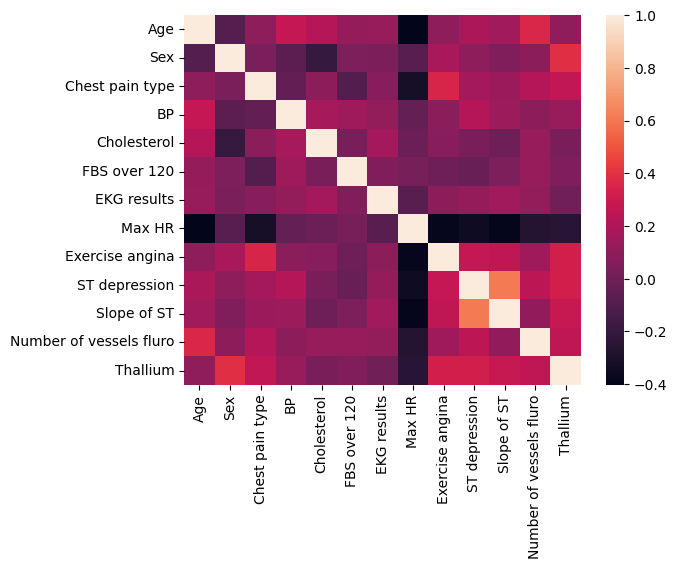

In [11]:
sns.heatmap(df.drop(columns='Heart Disease').corr())


<Axes: xlabel='Age', ylabel='Heart Disease'>

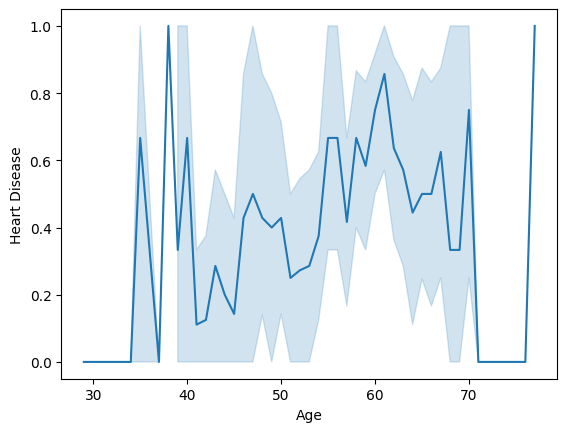

In [12]:
sns.lineplot(data=df,x='Age',y='Heart Disease')


<Axes: xlabel='Age', ylabel='Heart Disease'>

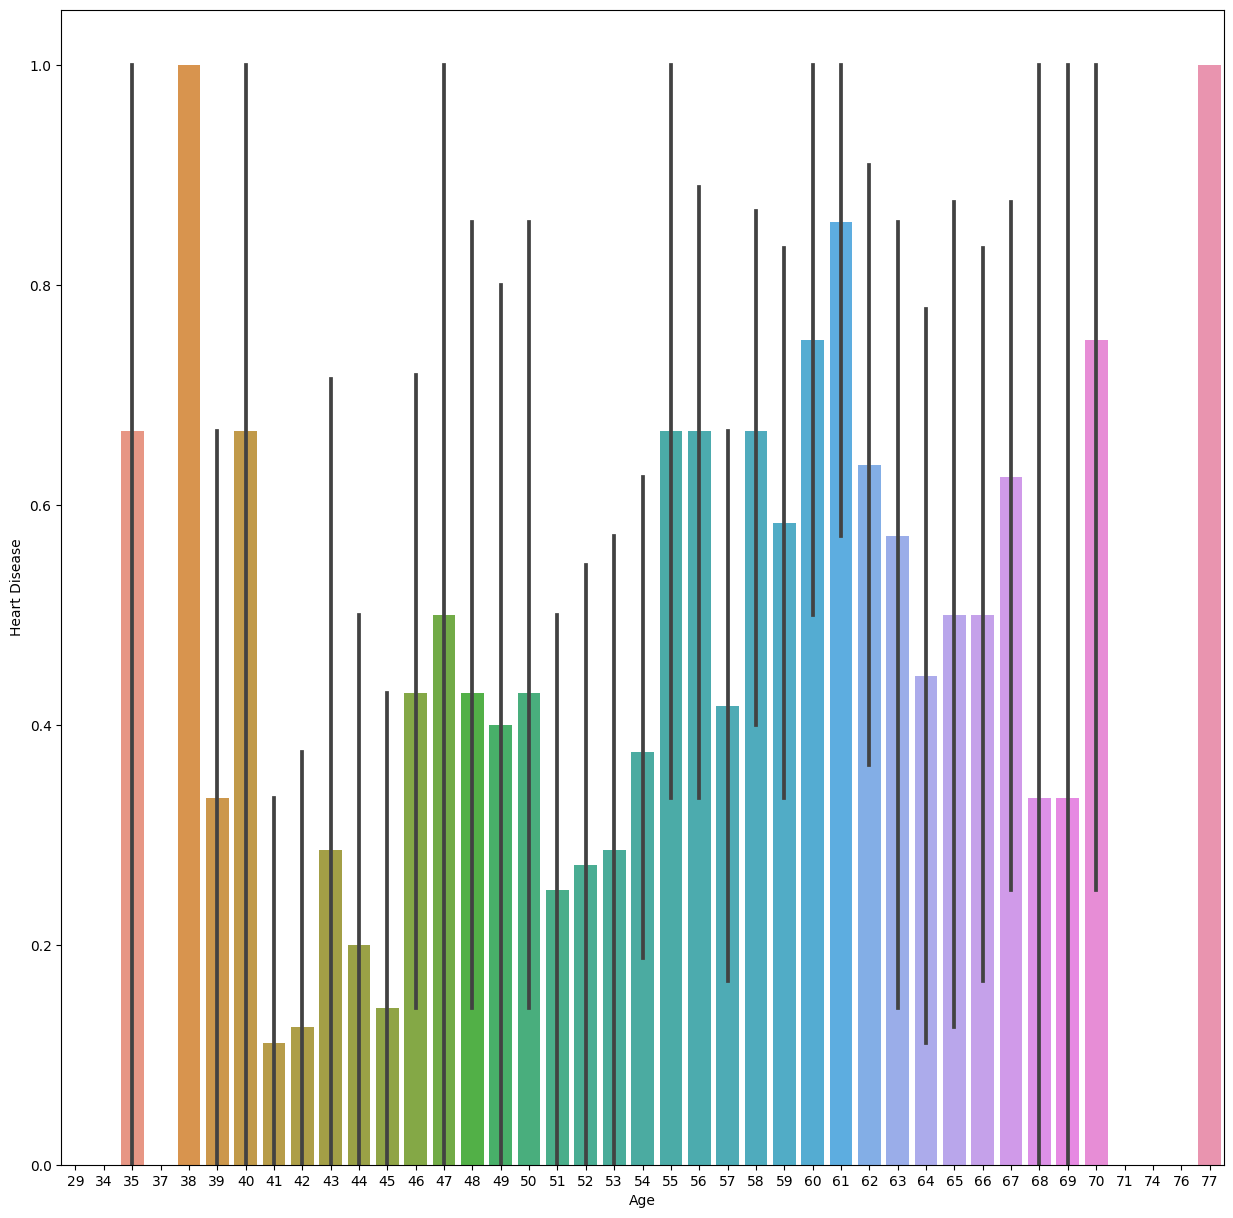

In [13]:
plt.figure(figsize=(15,15))
sns.barplot(data=df,y='Heart Disease',x='Age')

<Axes: xlabel='Sex', ylabel='Heart Disease'>

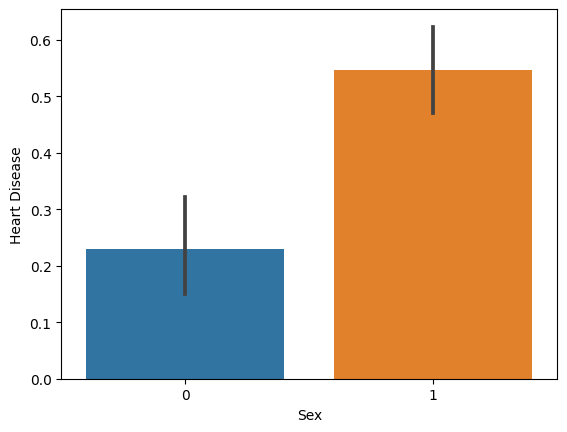

In [14]:
sns.barplot(data=df,y='Heart Disease',x='Sex')

<Axes: xlabel='Chest pain type', ylabel='Heart Disease'>

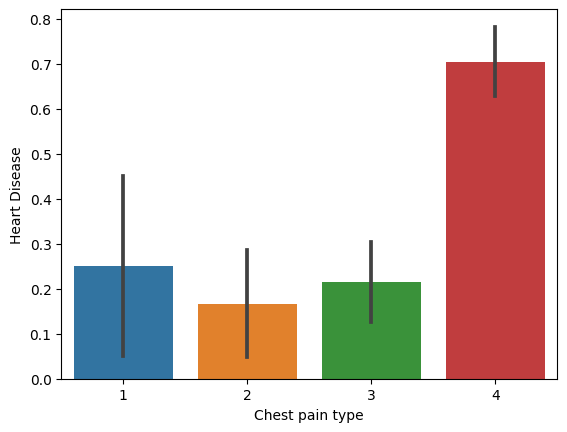

In [15]:
sns.barplot(data=df,y='Heart Disease',x='Chest pain type')


<Axes: xlabel='Thallium', ylabel='Heart Disease'>

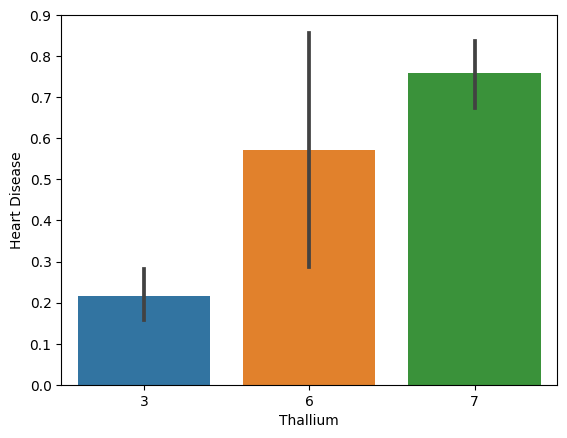

In [16]:
sns.barplot(data=df,y='Heart Disease',x='Thallium')


<Axes: xlabel='Exercise angina', ylabel='Heart Disease'>

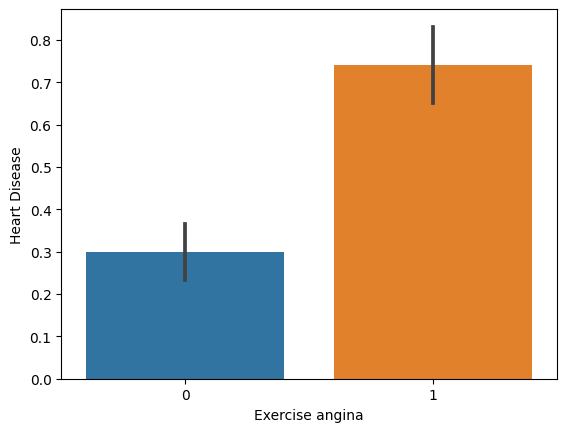

In [17]:
sns.barplot(data=df,y='Heart Disease',x='Exercise angina')


In [18]:
df.columns


Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

## Feature Scaling and Splitting the Dataset


In [19]:
# importing modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures

In [20]:
# selecting the target and the features
x = np.array(df.drop(columns='Heart Disease'))
y = np.array(df['Heart Disease'])

In [21]:
# features scaling
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [22]:
x_scaled[0]


array([ 1.71209356,  0.6894997 ,  0.87092765, -0.07540984,  1.40221232,
       -0.41702883,  0.98166365, -1.75920811, -0.7012223 ,  1.18101235,
        0.67641928,  2.47268219, -0.87570581])

In [23]:
# spliting the dataset
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,train_size=0.8)

## Logistic Regression Model


In [24]:
# importing modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error , accuracy_score , r2_score


In [25]:
# build the model and fit it
clf = LogisticRegression()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.7777777777777778

## Polynomial Regression


In [26]:
train_mses = []
cv_mses = []
models = []
scalers = []
accuracy=[]

for i in range(1,11) :
    
    poly = PolynomialFeatures(degree=i, include_bias=False)
    X_train_mapped = poly.fit_transform(x_train)

    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)

    model = LogisticRegression(max_iter=10000)
    model.fit(X_train_mapped_scaled, y_train )
    models.append(model)

    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)

    poly = PolynomialFeatures(i, include_bias=False)
    X_cv_mapped = poly.fit_transform(x_test)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

    # Compute the cross validation MSE
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_test, yhat) / 2
    cv_mses.append(cv_mse)

    accuracy.append(model.score(X_cv_mapped_scaled,y_test)*100)
max_accuracy = max(accuracy)
print(f"Maximum Accuracy: {max_accuracy:.2f}%")

Maximum Accuracy: 79.63%



## Model Evaluation


In [27]:
y_pred = clf.predict(x_test)


In [28]:
accuracy_score(y_test,y_pred)


0.7777777777777778